In [2]:
!python --version

Python 3.10.12


In [3]:
import torch
#torch.__version__

In [4]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-391upqxc
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-391upqxc
  Resolved https://github.com/facebookresearch/detectron2.git to commit 47d8ed7a1bd999719825f2e8a11d5b2828bc02c4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=7803813 sha256=085741ea6f5623290ae461a5c60fdd4

In [5]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 1s (65.0 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123105 files and directories currently install

In [7]:
!python --version

Python 3.10.12


In [6]:
!tree /usr/local/lib/python3.10/dist-packages/detectron2/model_zoo

/usr/local/lib/python3.10/dist-packages/detectron2/model_zoo
├── configs
│   ├── Base-RCNN-C4.yaml
│   ├── Base-RCNN-DilatedC5.yaml
│   ├── Base-RCNN-FPN.yaml
│   ├── Base-RetinaNet.yaml
│   ├── Cityscapes
│   │   └── mask_rcnn_R_50_FPN.yaml
│   ├── COCO-Detection
│   │   ├── faster_rcnn_R_101_C4_3x.yaml
│   │   ├── faster_rcnn_R_101_DC5_3x.yaml
│   │   ├── faster_rcnn_R_101_FPN_3x.yaml
│   │   ├── faster_rcnn_R_50_C4_1x.yaml
│   │   ├── faster_rcnn_R_50_C4_3x.yaml
│   │   ├── faster_rcnn_R_50_DC5_1x.yaml
│   │   ├── faster_rcnn_R_50_DC5_3x.yaml
│   │   ├── faster_rcnn_R_50_FPN_1x.yaml
│   │   ├── faster_rcnn_R_50_FPN_3x.yaml
│   │   ├── faster_rcnn_X_101_32x8d_FPN_3x.yaml
│   │   ├── fast_rcnn_R_50_FPN_1x.yaml
│   │   ├── fcos_R_50_FPN_1x.py
│   │   ├── __pycache__
│   │   │   ├── fcos_R_50_FPN_1x.cpython-310.pyc
│   │   │   └── retinanet_R_50_FPN_1x.cpython-310.pyc
│   │   ├── retinanet_R_101_FPN_3x.yaml
│   │   ├── retinanet_R_50_FPN_1x.py
│   │   ├── retinanet_R_50_FPN_1x.yaml
│   

Getting the Predictor


In [7]:
import detectron2
import warnings
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
warnings.simplefilter(action='ignore', category=UserWarning)

#selecting a model
config_file = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"

#create an instance of config file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file)
cfg.merge_from_file(config_file)

#Downloading model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
score_thresh = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh
predictor = DefaultPredictor(cfg)

model_final_68b088.pkl: 421MB [00:03, 137MB/s]                           


In [8]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

--2023-07-17 02:36:17--  https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107917 (105K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 105.39K  --.-KB/s    in 0.005s  

2023-07-17 02:36:18 (22.5 MB/s) - ‘input.jpg’ saved [107917/107917]



In [9]:
import cv2
input_url = "input.jpg"
img = cv2.imread(input_url)
output = predictor(img)

Visualization

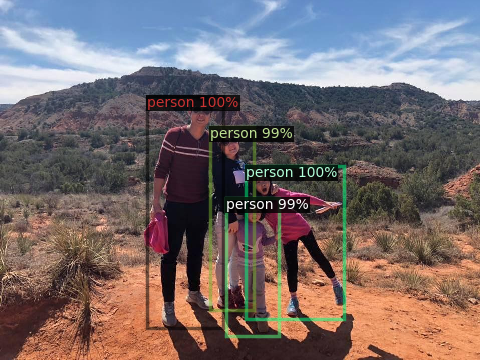

In [16]:
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
instances = output["instances"].to("cpu")
annotated_img = v.draw_instance_predictions(instances)
cv2_imshow(annotated_img.get_image()[:, :, ::-1])